# Task # 2 - To Explore Supervised Machine Learning

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### Author : Kavya Gajjar

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import metrics
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Checking all statistics for all variables individually

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### Distribution Plots for all the variables

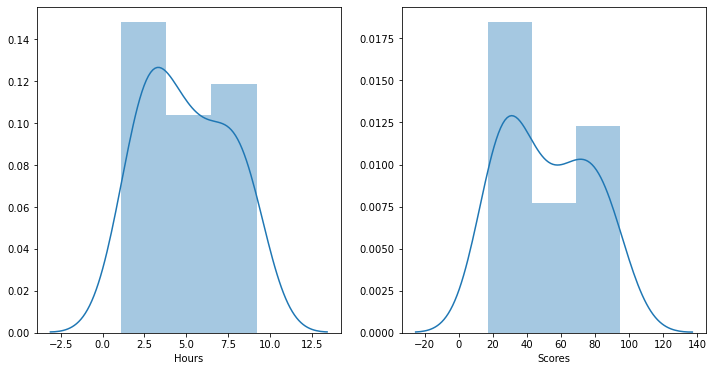

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.distplot(data['Hours'], ax=ax1)
sns.distplot(data['Scores'], ax=ax2)

### Finding the relation between two variables

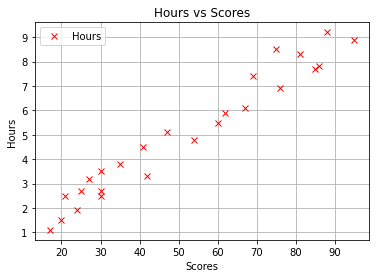

In [5]:
data.plot(x='Scores', y='Hours', style='rx')  
plt.title('Hours vs Scores')  
plt.xlabel('Scores')  
plt.ylabel('Hours')  
plt.grid(True)
plt.show()

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### We can see from the above analysis that dependent variable 'Scores' and independent variable 'Hours' are linearly related with approx 0.98 positive correlation

### Preparing the data for model

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Splitting the data into test and train with 20%-80% ration respectively

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

2.0181600414346974
[9.91065648]


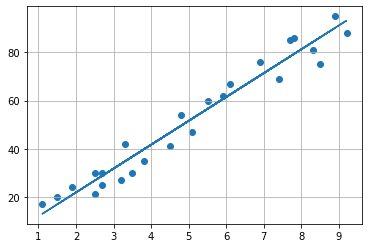

In [11]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.grid(True)
plt.show()

#### testing the model

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


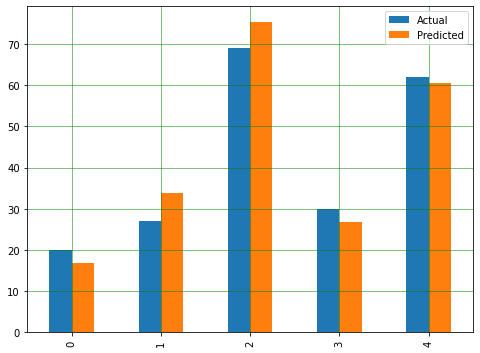

In [14]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

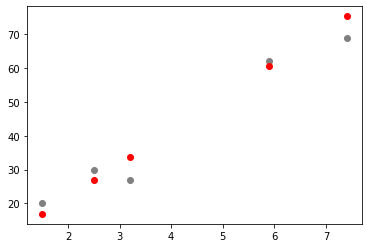

In [15]:
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


### Testing for any input values

In [17]:
Hours = float(input("Enter No. of Hours: "))
print("Predicted Scores: ",regressor.predict([[Hours]]))

Enter No. of Hours: 9.25
Predicted Scores:  [93.69173249]
